# Understanding the stransverse mass 

Plotting ttbar vs ttbar+axions in the stransverse mass variable.

1. Reading events from the ttbar process i.e. p p > t t~ in madgraph

2. Reading events from the ttbar+axion process i.e. p p > t t~ ax in madgraph

All with leptonically decaying tops and default madgraph cuts.

In [2]:
import awkward as ak
import hist
import numpy as np
import pylhe
from mt2 import mt2

### Input files, parameters

In [3]:
lumi = 139*1e3 #fb

dir_ttbar = '/Users/maevemadigan/Documents/*Work/*TopAlps/TopAlps/Madgraph/ttbar_dilepton/Events/mstr_events_withMTcut/'
dir_ttbarax = '/Users/maevemadigan/Documents/*Work/*TopAlps/TopAlps/Madgraph/ttbarax_dilepton/Events/mstr_events/'

### Histogram normalisations

In [4]:
def read_sigma_nevents(dirname):
    filename = dirname + dirname.split('/')[-2]+'_tag_1_banner.txt'
    with open(filename,'r') as f:
        data = f.readlines()
    f.close()
    sigma = float(data[-4].split(' ')[-1])
    nevents = float(data[-5].split(' ')[-1])
    return sigma, nevents

Obtain normalisation factors for each histogram

In [5]:
sigma_sm, nevents_sm = read_sigma_nevents(dir_ttbar)
sigma_ax, nevents_ax = read_sigma_nevents(dir_ttbarax)

ww_sm = sigma_sm*lumi/nevents_sm
ww_ax = sigma_ax*lumi/nevents_ax

### Load events 

In [6]:
pylhe.register_awkward()
arr_sm = pylhe.to_awkward(pylhe.read_lhe_with_attributes(dir_ttbar+"unweighted_events.lhe"))
arr_ax = pylhe.to_awkward(pylhe.read_lhe_with_attributes(dir_ttbarax+"unweighted_events.lhe"))

SM vectors and properties - ttbar

Leptons are at indices 6,9
Neutrinos are at indices 7,10

To do: generalise this somehow

In [7]:
#visible things
#Leptons are at index 6,9

vecL1SM = arr_sm.particles.vector[:,6]   
vecL2SM = arr_sm.particles.vector[:,9] 

massL1SM = 0.1
massL2SM = 0.1

pxL1SM = vecL1SM.px
pyL1SM = vecL1SM.py

pxL2SM = vecL2SM.px
pyL2SM = vecL2SM.py

#Invisible things
#neutrinos are at index 7,10
#Assume massless

# vecMissSM = arr_sm.particles.vector[:,7] + arr_sm.particles.vector[:,10]
# pmiss_xSM = vecMissSM.px
# pmiss_ySM = vecMissSM.py

# mmiss1SM = 0
# mmiss2SM = 0
# mmiss1SM


#Computing PTmiss as negative the sum of visible transverse PT's.  Should be equal to the sum of neutrino PT's
#B quarks are at indices 8,11

vecB1SM = arr_sm.particles.vector[:,8]   
vecB2SM = arr_sm.particles.vector[:,11]

vecMissSM = -(vecL1SM + vecL2SM + vecB1SM + vecB2SM)

pmiss_xSM = vecMissSM.px
pmiss_ySM = vecMissSM.py

mmiss1SM = 0
mmiss2SM = 0

Axion vectors and properties - ttbar + axion

Leptons are at indices 6,9
Neutrinos are at indices 7,10
Axion is at index 12


In [8]:
#visible things
#Leptons are at index 6,9

vecL1AX = arr_ax.particles.vector[:,6]   
vecL2AX = arr_ax.particles.vector[:,9] 

massL1AX = 0.1
massL2AX = 0.1

pxL1AX = vecL1AX.px
pyL1AX = vecL1AX.py

pxL2AX = vecL2AX.px
pyL2AX = vecL2AX.py

#Invisible things
#neutrinos are at index 7,10
#axion at index 12
#Assume massless

# vecMissAX = arr_ax.particles.vector[:,7] + arr_ax.particles.vector[:,10] + arr_ax.particles.vector[:,12]
# pmiss_xAX = vecMissAX.px
# pmiss_yAX = vecMissAX.py

# mmiss1AX = 0
# mmiss2AX = 0
# mmiss1AX

#Remaining visible things, so that invisible = - visible
#B quarks are at indices 8,11

vecB1AX = arr_ax.particles.vector[:,8]   
vecB2AX = arr_ax.particles.vector[:,11]

vecMissAX = -(vecL1AX + vecL2AX + vecB1AX + vecB2AX)

pmiss_xAX = vecMissAX.px
pmiss_yAX = vecMissAX.py

mmiss1AX = 0
mmiss2AX = 0

Calculate mt2

In [9]:
valSM = mt2(
        massL1SM, pxL1SM, pyL1SM,  # Visible 1: mass, px, py
    massL2SM, pxL2SM, pyL2SM,  # Visible 2: mass, px, py
    pmiss_xSM, pmiss_ySM,  # Missing transverse momentum: x, y
    mmiss1SM, mmiss2SM)  # Invisible 1 mass, invisible 2 mass


valAX = mt2(
        massL1AX, pxL1AX, pyL1AX,  # Visible 1: mass, px, py
    massL2AX, pxL2AX, pyL2AX,  # Visible 2: mass, px, py
    pmiss_xAX, pmiss_yAX,  # Missing transverse momentum: x, y
    mmiss1AX, mmiss2AX)  # Invisible 1 mass, invisible 2 mass

Plot histograms!

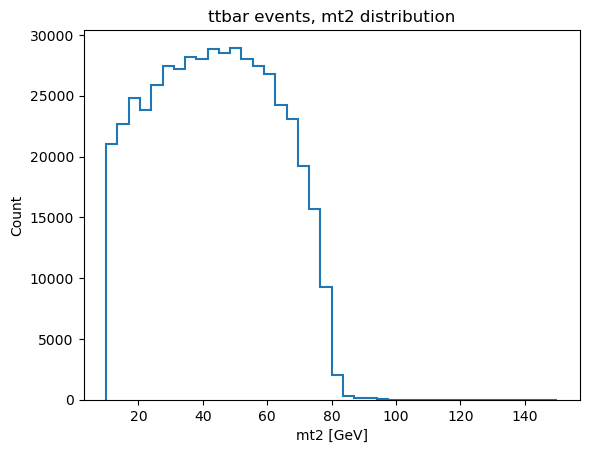

In [14]:
axis1 = hist.axis.Regular(bins=40, start=10, stop=150, name="smtr_SM");
hist1 = hist.Hist(axis1);
hist1.fill(smtr_SM=valSM, weight=ww_sm);


artists = hist1.plot1d();
ax = artists[0].stairs.axes;
ax.set_yscale("linear");
ax.set_xlabel(r"");
ax.set_ylabel("Count");
ax.set_title('ttbar events, mt2 distribution');
ax.set_xlabel('mt2 [GeV]');

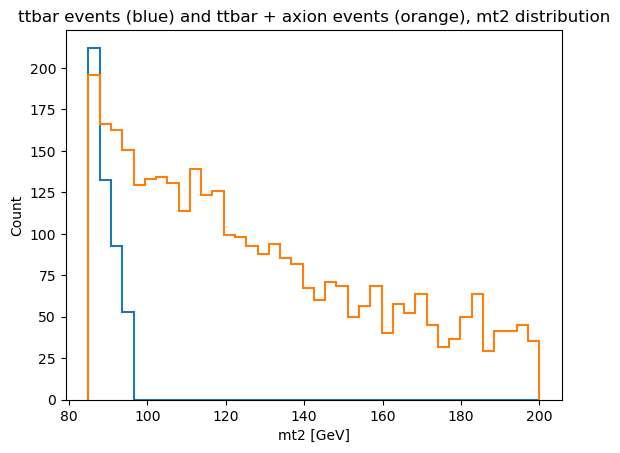

In [13]:
axis1 = hist.axis.Regular(bins=40, start=85, stop=200, name="smtr_SM");
hist1 = hist.Hist(axis1);
hist1.fill(smtr_SM=valSM, weight=ww_sm);

axis2 = hist.axis.Regular(bins=40, start=85, stop=200, name="smtr_AX");
hist2 = hist.Hist(axis2);
hist2.fill(smtr_AX=valAX, weight=ww_ax);


artists = hist1.plot1d();
artists = hist2.plot1d();
ax = artists[0].stairs.axes;
ax.set_yscale("linear");
ax.set_xlabel(r"");
ax.set_ylabel("Count");
ax.set_title('ttbar events (blue) and ttbar + axion events (orange), mt2 distribution');
ax.set_xlabel('mt2 [GeV]');